# Анализ продаж компьютерных игр
В нашем распоряжении из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Открываем файл и изучаем общую информацию о нем

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)
pd.set_option('chained_assignment', None)
warnings.filterwarnings("ignore")

try:
    games = pd.read_csv('D:/Practicum/Аналитика данных/Сборный проект 1/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [187]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [188]:
# Посмотрим кол-во пропусков
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [189]:
games.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [190]:
#Найдем явные дубликаты
games.duplicated().sum()


0

Явных дубликатов нет

In [191]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Предобработка данных

Для начала привдеем названия столбцов в порядок.

In [192]:
games.columns = games.columns.str.lower()

In [193]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Поменяем типы данных на соответствующие

In [194]:
# меняем тип данных в столбце год релиза, так как год может быть только целым числом
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [195]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [196]:
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<AxesSubplot:ylabel='Frequency'>

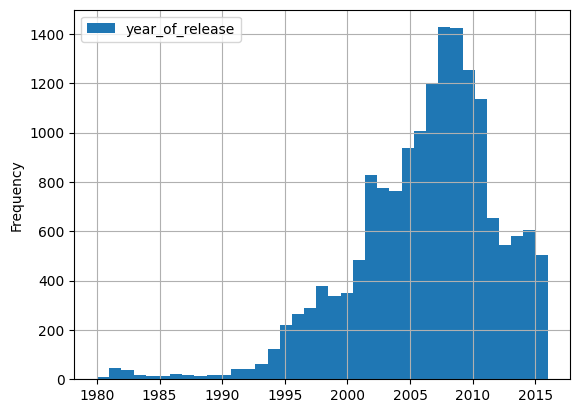

In [197]:
games.plot(kind='hist', y='year_of_release', grid=True, bins=37)

Разберемся со столбцом user_score  и далее заменим тип данных на числовой

In [198]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [199]:
games['user_score'].isna().sum()

6701

In [200]:
#Посчитаем кол-во строк, где оценка равна tdb
games[games['user_score'] == 'tbd']['name'].count()
#довольно много

2424

Поискав в просторах интернета можно найти аабревиатуру tbd - To Be Determined(не определено). Каких-то видимых закономернстей не прослеживается, поэтому поменяем эти значения на пропуски чтобы в дальнейшем можно было поменять тип данных на числовой

In [201]:
games[games['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [202]:
# Меняем tbd на NaN
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [203]:
games[games['user_score'] == 'tbd']['name'].count()
# от tbd избавились

0

In [204]:
games['user_score'].isna().sum()
# Пропусков стало только бьльше

9125

In [205]:
# поменяем тип данных в столбце на числовой
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games['user_score'].head()

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64

In [206]:
# Попробуем найти корреляцию между рейтингом пользователей и критиков
games['user_score'].corr(games['critic_score'])

0.580877832076724

In [207]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Типы данных приведены в порядок, приступим к заполнению пропусков**

Посмотрим пропуски в столбце name

In [208]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По играм совсем ничего нет, их всего две, так что удаляем.

In [209]:
games.dropna(subset=['name'], inplace=True)

In [210]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Посмотрим пропуски в годах релиза

В базе 269 пропусков по годам выпуска, но некторые из низ можно восстановить, так как в некоторых играх год присутствует в названии, например, 'FIFA Soccer 2004' говорит о том что игра выпущена в 2004 году.

In [211]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [212]:
games[games['year_of_release'].isna()].tail(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15119,Legacy of Ys: Books I & II,DS,<NA>,Role-Playing,0.02,0.00,0.00,0.0,NaN,NaN,NaN
15267,Saint,Wii,<NA>,Shooter,0.02,0.00,0.00,0.0,NaN,NaN,E10+
15292,Steal Princess,DS,<NA>,Platform,0.02,0.00,0.00,0.0,60.0,NaN,E10+
15338,Mario Tennis,3DS,<NA>,Sports,0.00,0.00,0.02,0.0,NaN,NaN,NaN
15535,Runaway: A Twist of Fate,DS,<NA>,Adventure,0.00,0.02,0.00,0.0,66.0,NaN,T
15557,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,<NA>,Racing,0.00,0.00,0.02,0.0,NaN,NaN,NaN
15675,Cabela's Alaskan Adventure,PS2,<NA>,Sports,0.01,0.01,0.00,0.0,NaN,NaN,NaN
15704,Writing and Speaking Beautiful Japanese DS,DS,<NA>,Misc,0.00,0.00,0.02,0.0,NaN,NaN,NaN
15754,Virtua Quest,PS2,<NA>,Role-Playing,0.01,0.01,0.00,0.0,53.0,7.6,T
15795,Shonen Jump's Yu-Gi-Oh! GX Card Almanac,DS,<NA>,Misc,0.00,0.00,0.02,0.0,NaN,NaN,NaN


Заполняем пропуски в годах релиза игра исходя из названия игры.

In [213]:
# Сначала создадим функцию для нахождения года выпуска игры в названии
# Если жанр игры спорт, то выход игры на год раньше, например, фифа 2015 выходит в 2014 году

def year_in_name(row):
    """
    Функция определения года выпуска по названию видеоигры
    """
    year = [int(i) for i in row['name'].split() if i.isdigit()]
    for i in year:
        if 1980 <= i <= 2016:
            if row['genre'] == 'Sports':
                return i - 1
            else:
                return i
        else:
            continue


In [214]:
# Применим созданную функцию к датасету и заполним поле года выпуска игры
games.loc[games['year_of_release'].isna(), 'year_of_release'] = games.apply(year_in_name, axis=1)

In [215]:
games.isna().sum()

name                  0
platform              0
year_of_release     254
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Было 269, стало 254 пропуска, немного но что-то заполнили. Остальное удаляем, так как пропусков всего около 1.5%

In [216]:
games.dropna(subset=['year_of_release'], inplace=True)

In [217]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         8987
rating             6681
dtype: int64

Пропуски остались только в столбцах рейтингов, причем их около половины от всей базы данных.

Глянем, что в пропусках по оценкам.

<AxesSubplot:>

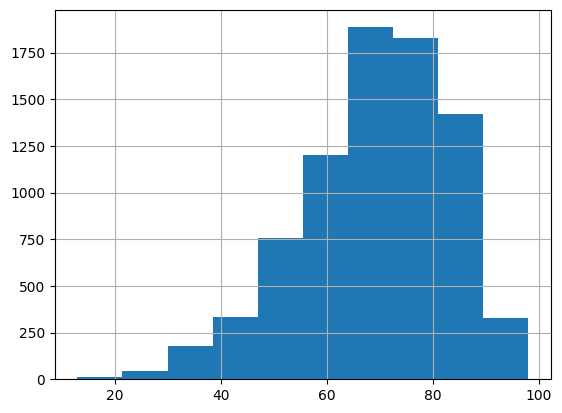

In [218]:
games['critic_score'].hist()

In [219]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

<AxesSubplot:>

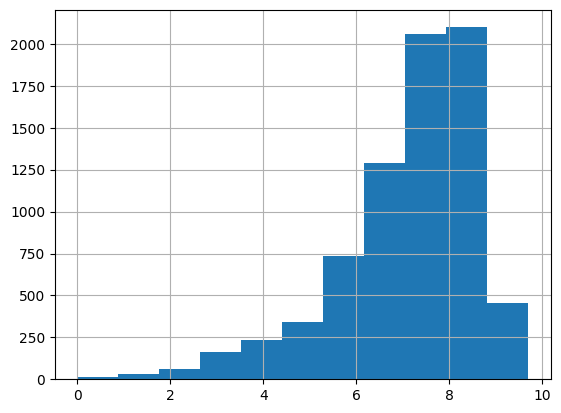

In [220]:
games['user_score'].hist(bins=11)

In [221]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [222]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [223]:
games.groupby('rating')['rating'].count().sort_values(ascending=False)

rating
E       3930
T       2905
M       1536
E10+    1394
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Согласно открытым официальным [источникам](https://www.kingston.com/ru/blog/gaming/understanding-video-games-age-ratings-esrb-pegi) распределения возрастных категорий имеем следущее:

- RP - категория еще не определена
- AO - Для взрослых старше 18 лет
- K - A - в 1998 году переименован в категорию E
- EC - для детей младшего возраста от 3 лет
- E10+ - старше 10 лет
- M - страше 17 лет
- T - старше 13 лет
- E - все возврастные категории

In [224]:
games.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


In [225]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  Int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           9778 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Таким образом можно сделать: строку с категорией RP игры меняем на пустое значение, AO объединяем с M, K-A и EC объединяем с E.

In [226]:
games.loc[games['rating'] == 'AO', 'rating'] = 'M'
games.loc[games['rating'].isin(['K-A', 'EC']), 'rating'] = 'E'
games.loc[games['rating'] == 'RP', 'rating'] = np.nan
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  Int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           9777 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [227]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+'], dtype=object)

**Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.**

In [228]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Данные скорректированы, необходимые столбцы добавлены, можно начинать исследовательский анализ.

**Вывод:** <br>
- Привели названия столбцов к нижнем регистру, чтобы соответствовало snake_case
- Привели типы данных к тем, что должны быть в конкретном стобце
- Частично заполнили пропуски в годах выпуска игры по названию
- Добавили новые столбцы - суммарные продажи по всем представленным регионам
- Убрали строки с критическими пропусками в данных - название и годы выпуска игры(всего потерялось около 1.5% от всех первоначальных данных)
- Осталось чуть больше половины пропусков в столбцах оценок как критиков, так и пользователей, их оставили незаполненными, так как при заполнении данные сильно исказились бы
- Причины, которые могли привести к пропускам:
    1. Малоизвестная игра - поиграли 100 человек и не оставили отзыв, ведь далеко не все оставляют отзывы
    2. Техническая ошибка - при выгрузке данных часть потерялась
    3. Человеческий фактор - база данных общедоступная, то есть ее могут выгружать и дополнять кто и как угодно (возможно первый выгрузил базу без оценок, а второй наложил на нее оценки: что из игр совпало - там оценки стоят, остальные остались пропуски)


In [229]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  Int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           9777 non-null   object 
 11  total_sales      16459 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

## Исследовательский анализ данных

### Анализ выпуска игр в разные годы

<AxesSubplot:title={'center':'Распределение выпуска игр в разные годы'}, xlabel='Год выпуска', ylabel='Кол-во игр'>

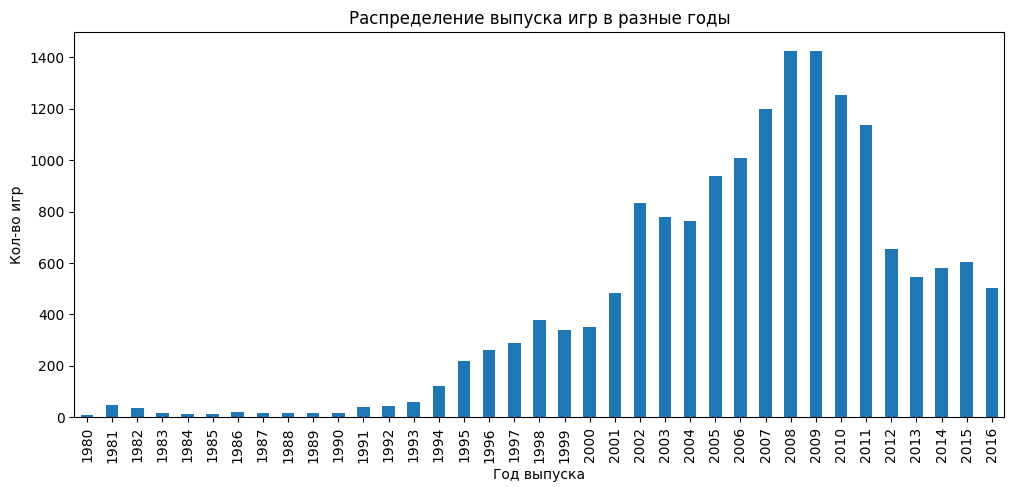

In [230]:
(
    games.groupby('year_of_release')['name'].count()
    .plot(kind='bar', title='Распределение выпуска игр в разные годы', 
          xlabel='Год выпуска', ylabel='Кол-во игр', figsize=(12,5))
)

<AxesSubplot:title={'center':'Продажи по годам'}, xlabel='Год выпуска', ylabel='Сумма продаж'>

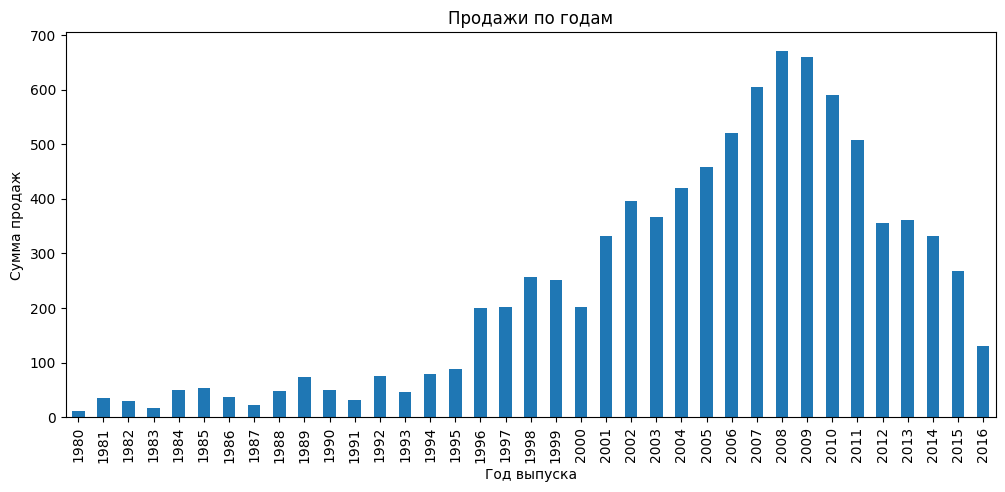

In [231]:
(
    games.groupby('year_of_release')['total_sales'].sum()
    .plot(kind='bar', title='Продажи по годам', figsize=(12,5),
         xlabel='Год выпуска', ylabel='Сумма продаж')
)

До 1995 года выпускалось менее 200 игр + игры 30-летней давности потеряли свою актуальность, поэтому их не рассматриваем.
Начиная с 1995 года вплоть до 2009 идет резкий подъем кол-ва выпускаемых игр, даее спад, связан он, скорее всего, с двумя причинами:

1. Идет популяризация смартфонов, часть разработчиков уходит в эту индустрию, ведь рынок только начинает развиваться
2. Спрос у пользователей и качества игр изменились, теперь лучше сделать одну хорошую игру(например ГТА) нежели 5 посредственных(Марио)

Также видно, что чем больше игр выпущено, тем больше сумма продаж, что очень даже логично.

### Анализ продаж по платформам

<AxesSubplot:title={'center':'Продажи по платформам'}, xlabel='Платформа', ylabel='Сумма продаж, млн'>

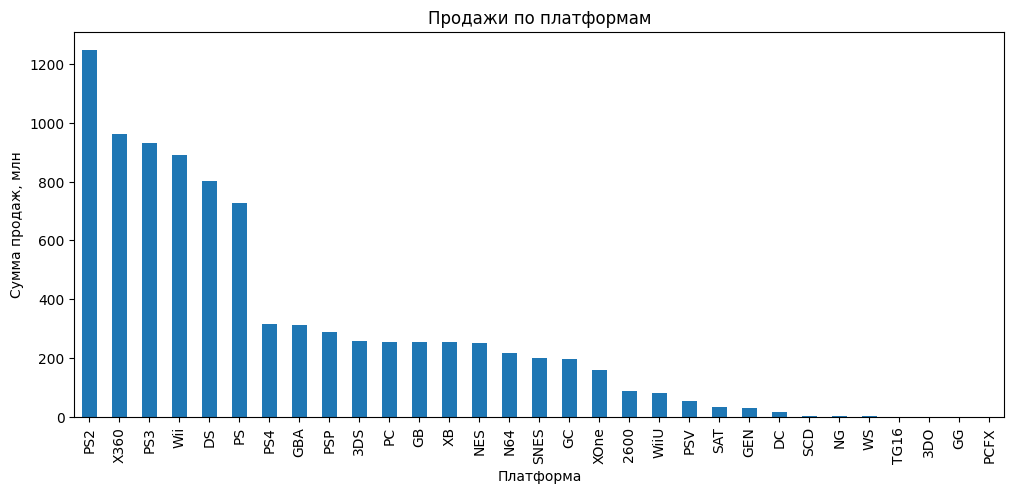

In [232]:
(
    games.groupby('platform')['total_sales'].sum()
    .sort_values(ascending=False)
    .plot(kind='bar', title='Продажи по платформам', figsize=(12,5),
         xlabel='Платформа', ylabel='Сумма продаж, млн')
)


Выберем платформы с наибольшими суммарными продажами (возьмем топ-10) и построим распределение по годам.

In [233]:
#Нашли топ-10 платформ по прибыли
top_10_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_10_platform

platform
PS2     1247.28
X360     961.30
PS3      931.34
Wii      891.18
DS       802.79
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.54
3DS      257.81
Name: total_sales, dtype: float64

<AxesSubplot:title={'center':'Продажи топ-10 платформ по годам'}, xlabel='Год выпуска', ylabel='Продажи, млн'>

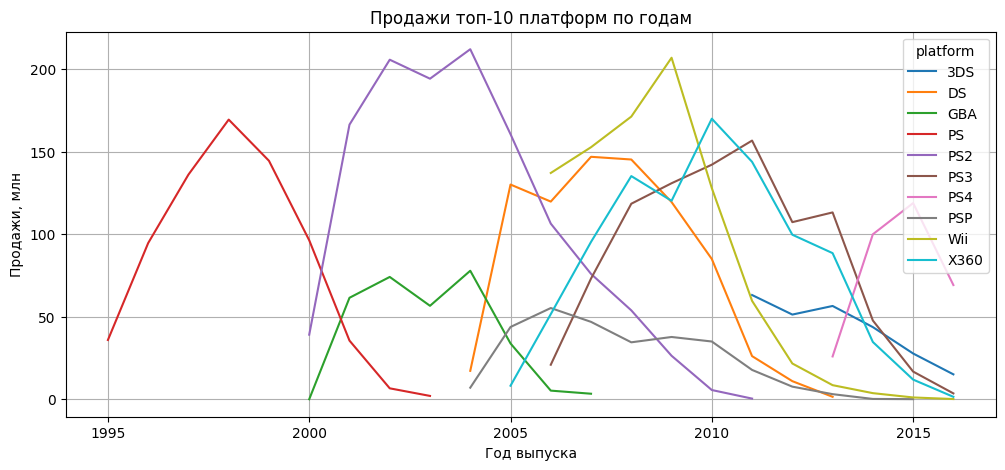

In [234]:
(
    pd.pivot_table(games.query('platform in @top_10_platform.index and year_of_release > 1994'), index='year_of_release',
                   columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='line', grid=True, figsize=(12,5),
         xlabel='Год выпуска', ylabel='Продажи, млн', title='Продажи топ-10 платформ по годам')
)

In [235]:
#Посмотрим сколько живет каждая платформа из топ-10
years_of_platform = (
    games.query('platform in @top_10_platform.index and year_of_release > 1994')
    .groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'})
    .reset_index()
)
years_of_platform.head(20)
years_of_platform.groupby('platform')['year_of_release'].count().sort_values()



platform
PS4      4
3DS      6
GBA      8
PS       9
DS      10
PS3     11
Wii     11
PS2     12
PSP     12
X360    12
Name: year_of_release, dtype: int64

В среднем продолжительность популярности платфоры 10 лет, а ее пик примерно посередине. Эта теденция очень хорошо прослеживается напримере игр, выпущеннх для SonyPlaystation. Сначала выпускают первую версию, она находит своего покупателя, затем вторую, первая в это время идет наспад, затем третья и тд.

### Определение актуального периода

Учитывая результаты на предыдущих шагах продолжительность популярности платформы 10 лет, т.е. с 2007 года, с другой стороны вторая половина популярности идет на спад, что нас не устраивает, поэтому выберем актуальный период в два раза меньше, т.е. с 2012 по 2016 года.

In [236]:
games = games.query('year_of_release > 2011')

### Определение потенциально прибильных платформ

Найдем несколько потенциально прибильных платформ.

In [237]:
pd.pivot_table(games, index='platform', columns='year_of_release', values='total_sales',
               aggfunc='sum', fill_value=' ')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,,,
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.6
PS4,,25.99,100.0,118.9,69.25
PSP,7.69,3.14,0.24,0.12,
PSV,16.19,10.59,11.9,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.6


По условиям проекта данные за 2016 год могут быть неполными, что подтверждает падение прибыли на всех платформах на этот год, поэтому в данном случае его не учитываем. 

Видно преобладание двух платформ на рынке - это XOne и PS4, они имеют наилучшие перспективы.

In [238]:
top_platform = ['XOne', 'PS4']

### Глобальные продажи игр в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по потенциально прибыльным платформам, определенным на предыдущем этапе.

Text(0.5, 1.0, 'Диаграмма размаха по потенциально прибыльным платформам')

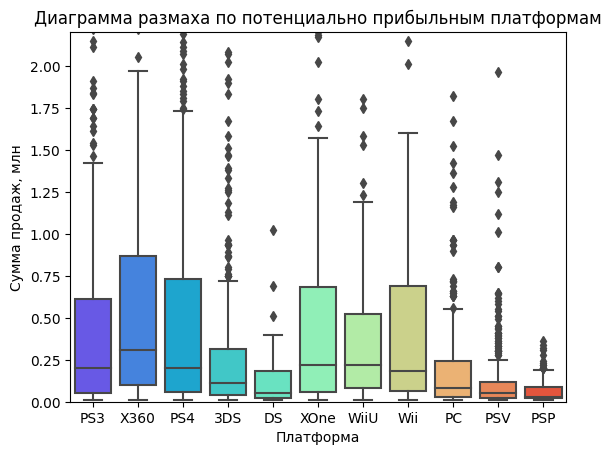

In [239]:
sns.boxplot(data=games, y='total_sales', x='platform', palette='rainbow')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж, млн')
plt.ylim(0,2.2)
plt.title('Диаграмма размаха по потенциально прибыльным платформам')

In [240]:
games.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


Стоит заметить, что выход в мир более новой модели платформы заставляет начинать забывать игры на более поздних моделях(например, PS4-PS3, XOne-X360, WiiU-Wii). Также видно, что основные характеристики более поздних моделей не уступают более ранним, учитывая, что с большой вероятностью данные за 2016 год неполные - это хороший показатель.Таким образом, если смотреть в будущее, а не прошлое, наиболее предпочтительные модели - PS4, XOne и WiiU, хотя WiiU сильно уступает в объемах продаж.

Text(0.5, 0.98, '')

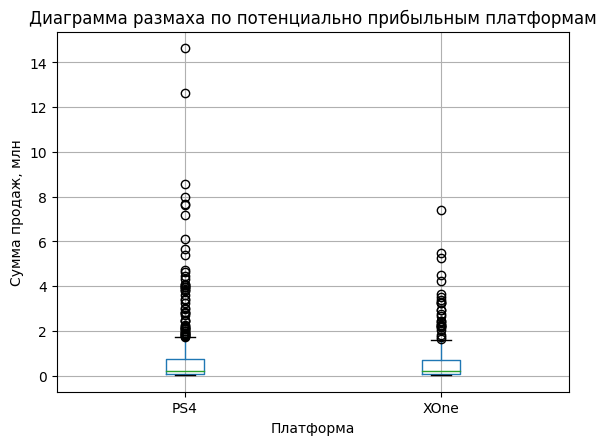

In [241]:
(
    games.query('platform in @top_platform')
    .boxplot('total_sales', by='platform')
)
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж, млн')
plt.title('Диаграмма размаха по потенциально прибыльным платформам')
plt.suptitle(None)

Text(0.5, 0.98, '')

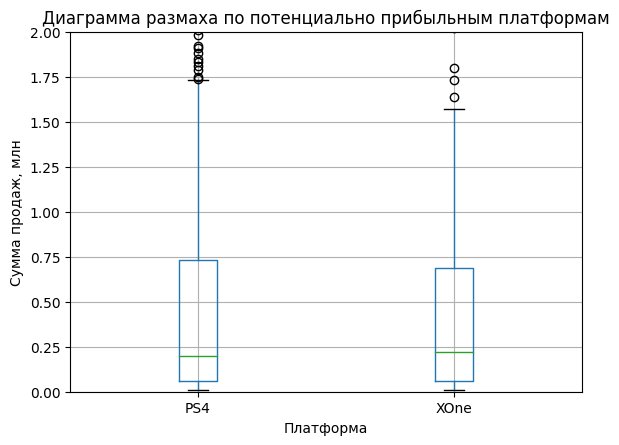

In [242]:
(
    games.query('platform in @top_platform')
    .boxplot('total_sales', by='platform')
)
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж, млн')
plt.ylim(0,2)
plt.title('Диаграмма размаха по потенциально прибыльным платформам')
plt.suptitle(None)

In [243]:
(
    games.query('platform in @top_platform')
    .groupby('platform')['total_sales'].describe()
)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


По диаграмме размаха видно, что медианные значения по продажам практически идентичны. Одна поклонников Сони больше, чем Иксбокса, также разброс по платформе PS4 сильно выше, это подтверждается описательными характеристиками, выведенными после диаграмм размаха.

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

Выберем в качестве исследуемой платформы PS4, так как она самая популярная и продаваемая.

In [244]:
selected_games = games.query('platform == "PS4"')

- **Отзывы пользователей**

Text(0, 0.5, 'Сумма продаж, млн')

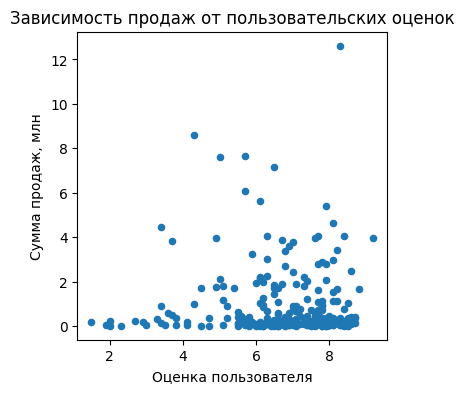

In [245]:
selected_games.plot(kind='scatter', x='user_score', y='total_sales', figsize=(4,4))
plt.title('Зависимость продаж от пользовательских оценок')
plt.xlabel('Оценка пользователя')
plt.ylabel('Сумма продаж, млн')

In [246]:
print(f'Коэффициент корреляции: {selected_games["user_score"].corr(selected_games["total_sales"])}')

Коэффициент корреляции: -0.03195711020455643


- **Отзывы критиков**

Text(0, 0.5, 'Сумма продаж, млн')

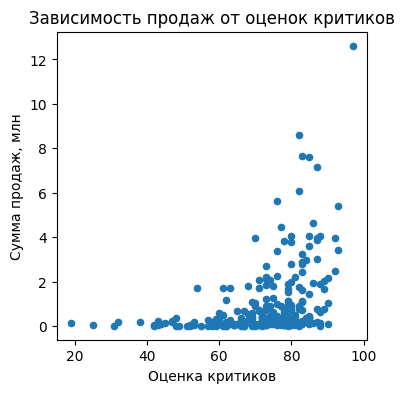

In [247]:
selected_games.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(4,4))
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж, млн')

In [248]:
print(f'Коэффициент корреляции: {selected_games["critic_score"].corr(selected_games["total_sales"])}')

Коэффициент корреляции: 0.4065679020617816


**Зависимость между оценками критиков и пользователей**

Text(0, 0.5, 'Оценка пользователей')

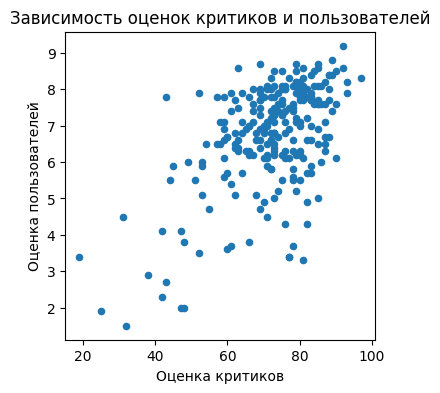

In [249]:
selected_games.plot(kind='scatter', x='critic_score', y='user_score', figsize=(4,4))
plt.title('Зависимость оценок критиков и пользователей')
plt.xlabel('Оценка критиков')
plt.ylabel('Оценка пользователей')

In [250]:
print(f'Коэффициент корреляции: {selected_games["critic_score"].corr(selected_games["user_score"])}')

Коэффициент корреляции: 0.5576539782764632


Оценки критиков вносят незначительное влияние на продажи игр на платформе PS4(коэффициент корреляции = 0.41), в то время как оценки пользователей никак не влияют на продажи(коэффициент корреляции = -0.03). Коэффициент в последнем случае практически равен нулю, поэтому неважно он больше или меньше нуля(прямая или обратная зависимость) - все равно не учитываем. Также наблюдается средняя зависимость (коэффициент корреляции = 0.56) между оценками пользователей и критиков.

### Влияние отзывов пользователей и критиков на продажи на других платформах

Посмотрим на коэффициенты корреляций для других платформ из топ-10.

In [251]:
for plat in top_10_platform.index:
    current_games = games.query('platform == @plat')
    print(plat)
    print(f'Корреляция между оценкой критиков и продажами: {current_games.critic_score.corr(current_games.total_sales)}')
    print(f'Корреляция между оценкой пользователей и продажами: {current_games.user_score.corr(current_games.total_sales)}')
    print(f'Корреляция между оценками критиков и пользователей: {current_games.critic_score.corr(current_games.user_score)}')
    print()

PS2
Корреляция между оценкой критиков и продажами: nan
Корреляция между оценкой пользователей и продажами: nan
Корреляция между оценками критиков и пользователей: nan

X360
Корреляция между оценкой критиков и продажами: 0.36057348885073387
Корреляция между оценкой пользователей и продажами: 0.006163978646213357
Корреляция между оценками критиков и пользователей: 0.5573519890914962

PS3
Корреляция между оценкой критиков и продажами: 0.33149725926295887
Корреляция между оценкой пользователей и продажами: -0.005143522887113815
Корреляция между оценками критиков и пользователей: 0.5394556902119466

Wii
Корреляция между оценкой критиков и продажами: -0.4243413011077494
Корреляция между оценкой пользователей и продажами: 0.29619680007479526
Корреляция между оценками критиков и пользователей: 0.8162953479657884

DS
Корреляция между оценкой критиков и продажами: nan
Корреляция между оценкой пользователей и продажами: 0.88270872757644
Корреляция между оценками критиков и пользователей: nan

PS


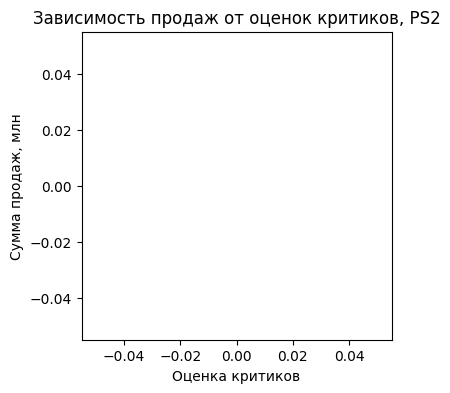

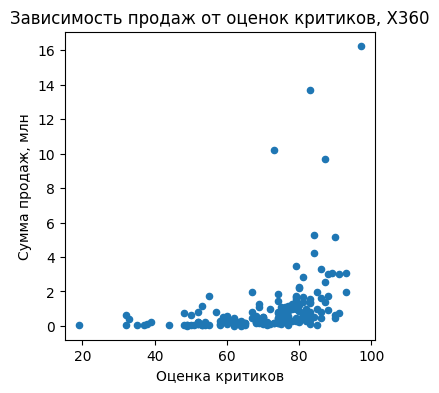

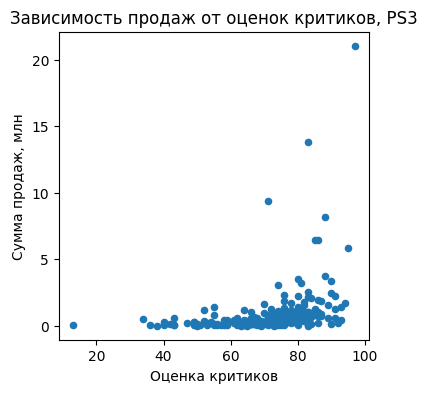

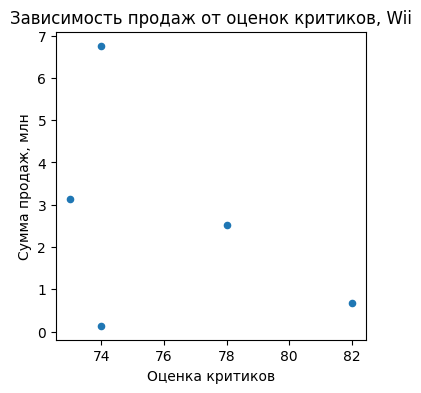

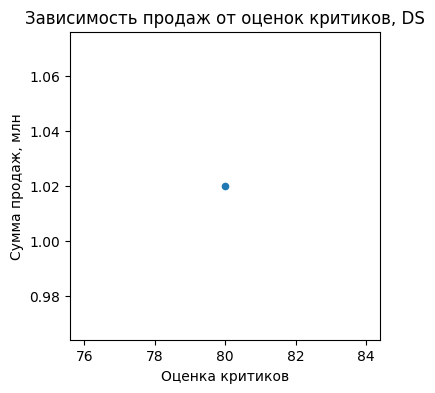

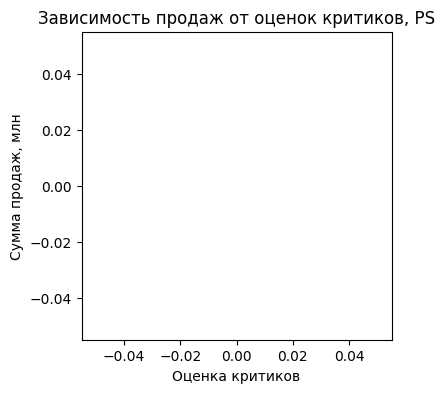

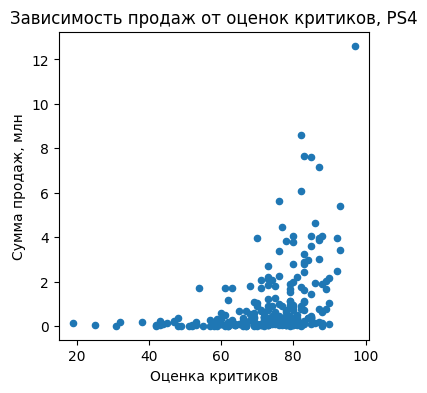

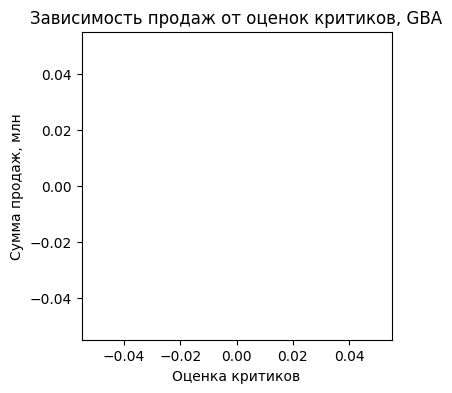

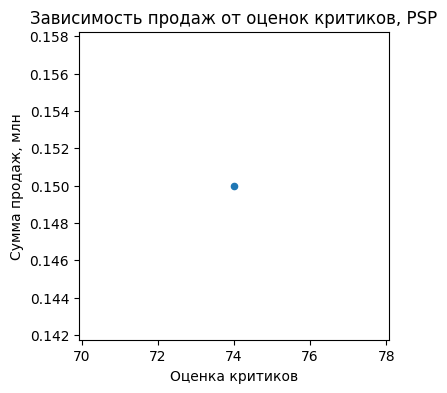

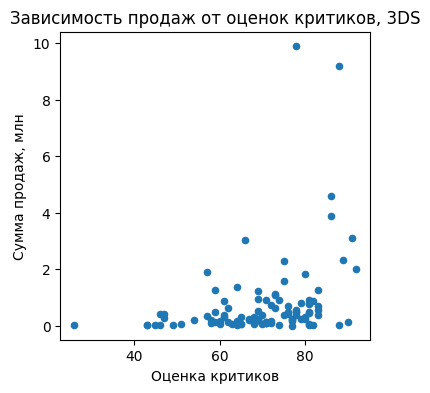

In [252]:
for plat in top_10_platform.index:
    current_games = games.query('platform == @plat')
    current_games.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(4,4))
    plt.title(f'Зависимость продаж от оценок критиков, {plat}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Сумма продаж, млн')
    print()

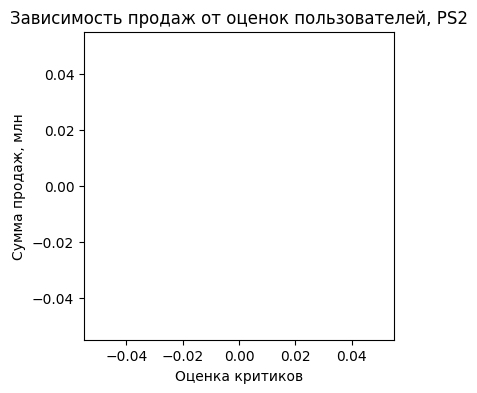

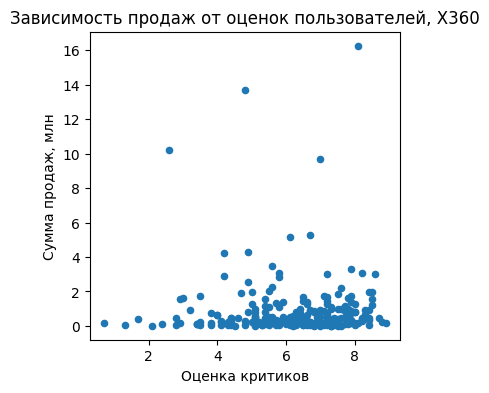

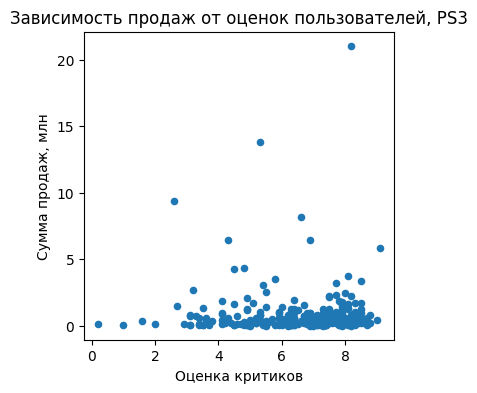

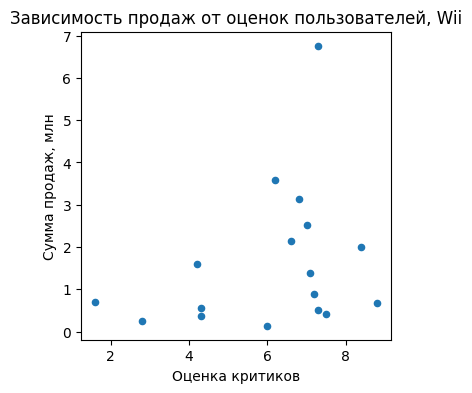

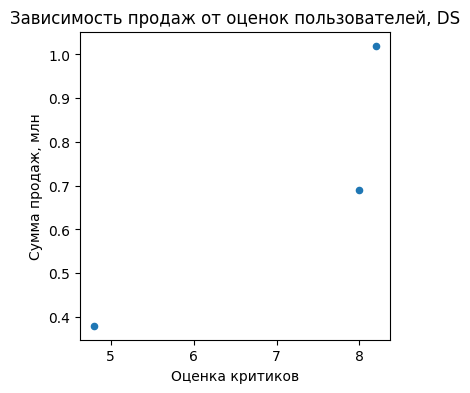

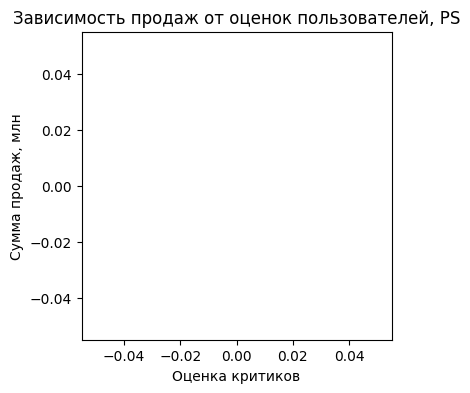

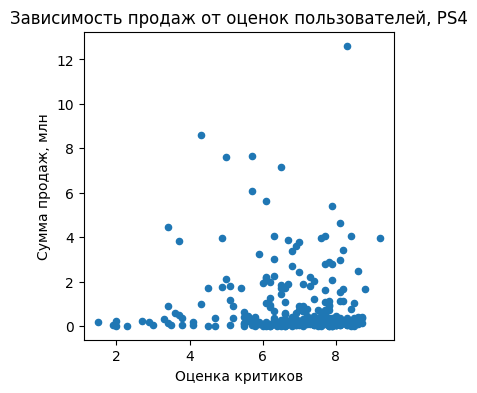

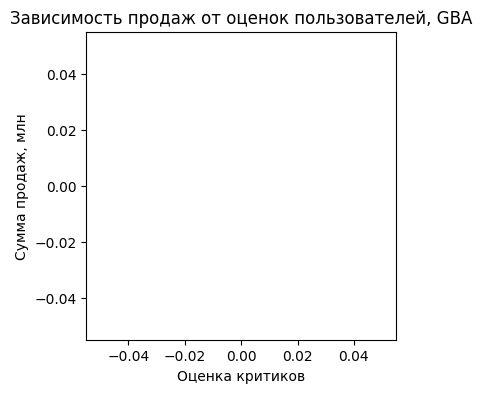

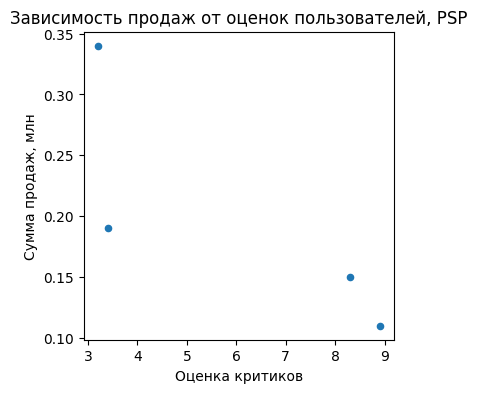

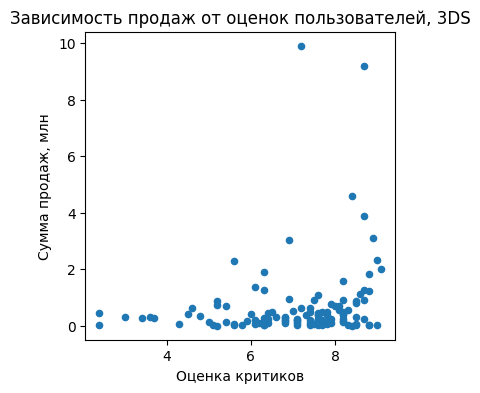

In [253]:
for plat in top_10_platform.index:
    current_games = games.query('platform == @plat')
    current_games.plot(kind='scatter', x='user_score', y='total_sales', figsize=(4,4))
    plt.title(f'Зависимость продаж от оценок пользователей, {plat}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Сумма продаж, млн')
    print()

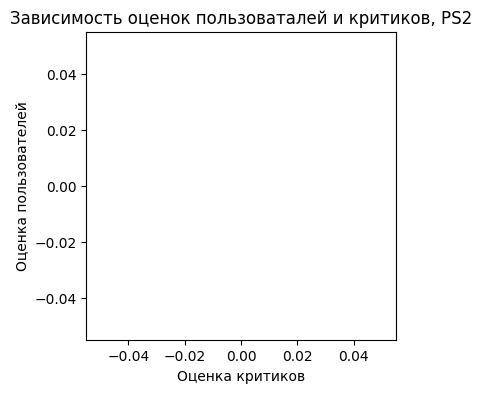

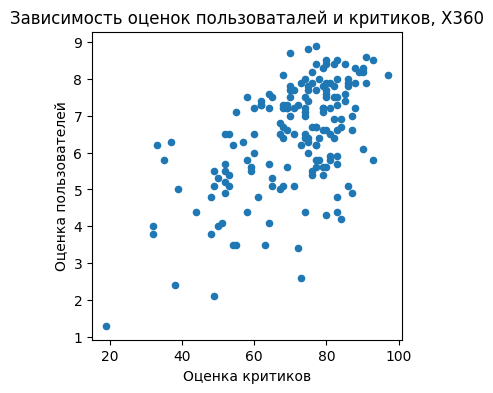

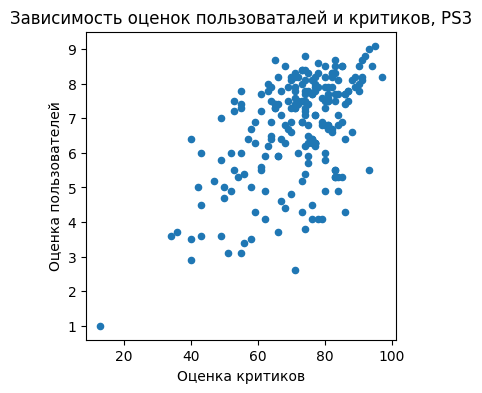

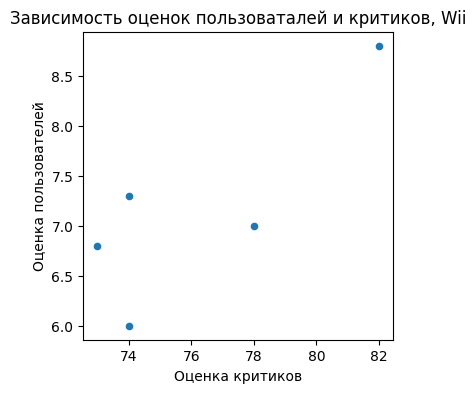

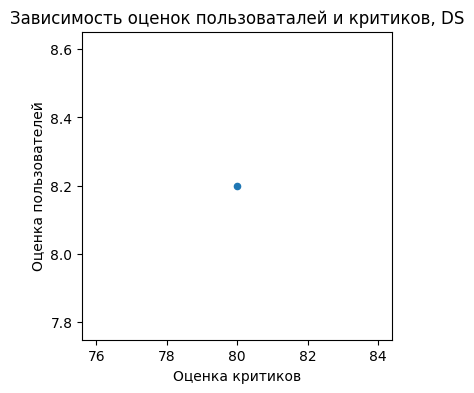

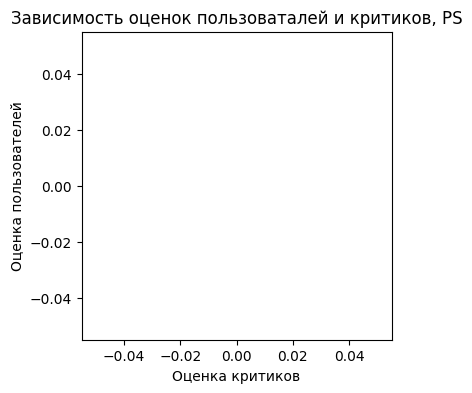

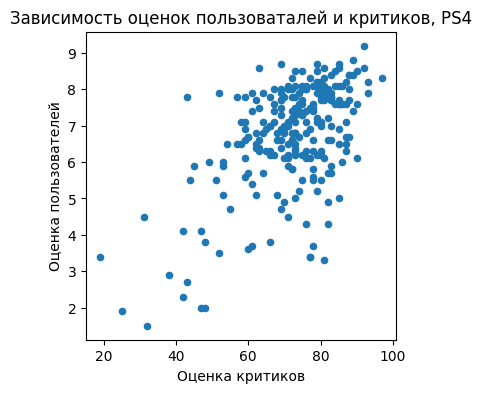

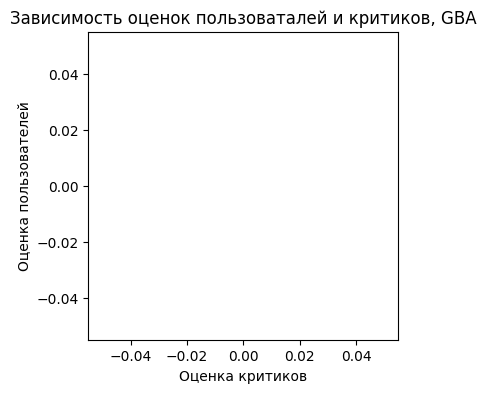

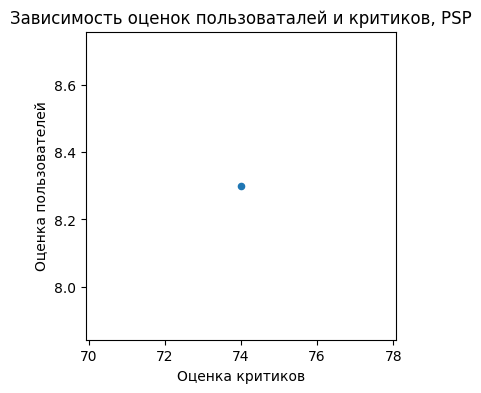

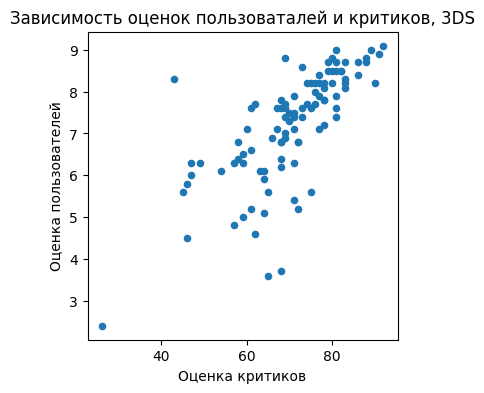

In [254]:
for plat in top_10_platform.index:
    current_games = games.query('platform == @plat')
    current_games.plot(kind='scatter', x='critic_score', y='user_score', figsize=(4,4))
    plt.title(f'Зависимость оценок пользоваталей и критиков, {plat}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Оценка пользователей')
    print()

В данном случае рассматриваются игры, выпускаемые с 2012 года, остальные были убраны из-за неактуальности. Именно поэтому по некоторым платформам выплала в коэффициэнтах корреляций между величинами пустота(например, PS1: уже вышли три новые версии PS, поэтому первую все забросили). В таком случае рассматриваем корреляции только у актуальны платформ. 

Что можно выделить: зависимость оценок пользователей и продаж совсем слабая, т.е. отзывы пользователей практически не влияют на продажи игр. От оценок критиков есть прямая зависимость, однако слабо выраженная. Средняя зависимость наблюдается между оценками критиков и оценками игроков.

### Распределения игр по жанрам

Посмотрим на общее распределение игр по жанрам.

In [255]:
(
    games.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


Text(0, 0.5, 'Сумма продаж, млн')

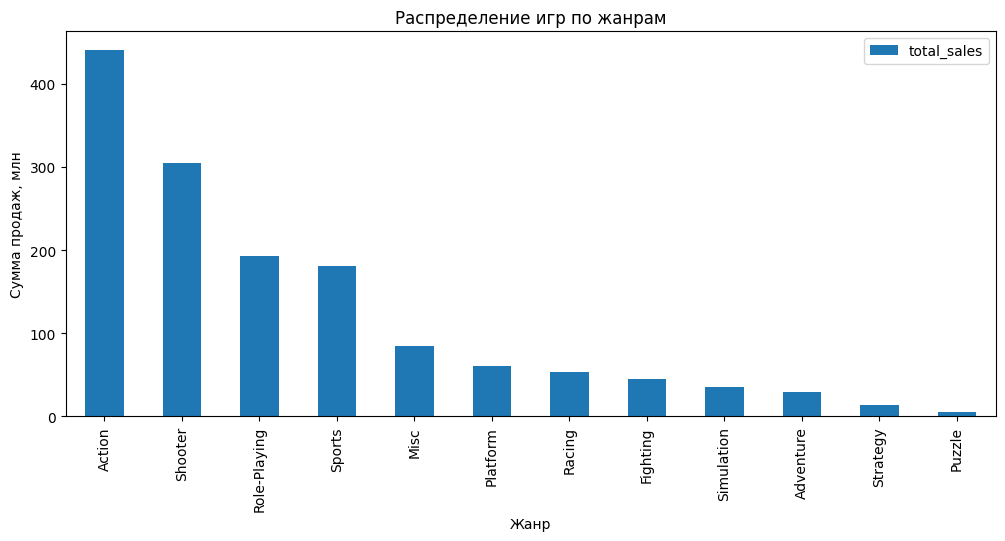

In [256]:
(
    games.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', figsize=(12,5))
)
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж, млн')


In [257]:
(
    games.pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'count', 'median'))
    .sort_values(by='sum', ascending=False)
)

,count,median,sum
genre,,,
Action,1031,0.120,441.12
Shooter,235,0.440,304.73
Role-Playing,370,0.140,192.80
Sports,268,0.240,181.07
Misc,192,0.120,85.04
Platform,85,0.210,61.00
Racing,115,0.140,53.50
Fighting,109,0.130,44.49
Simulation,80,0.120,35.12


In [258]:
(
    games.pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'count', 'median'))
    .sort_values(by='median', ascending=False)
)

,count,median,sum
genre,,,
Shooter,235,0.440,304.73
Sports,268,0.240,181.07
Platform,85,0.210,61.00
Role-Playing,370,0.140,192.80
Racing,115,0.140,53.50
Fighting,109,0.130,44.49
Action,1031,0.120,441.12
Misc,192,0.120,85.04
Simulation,80,0.120,35.12


Text(0.5, 0.98, '')

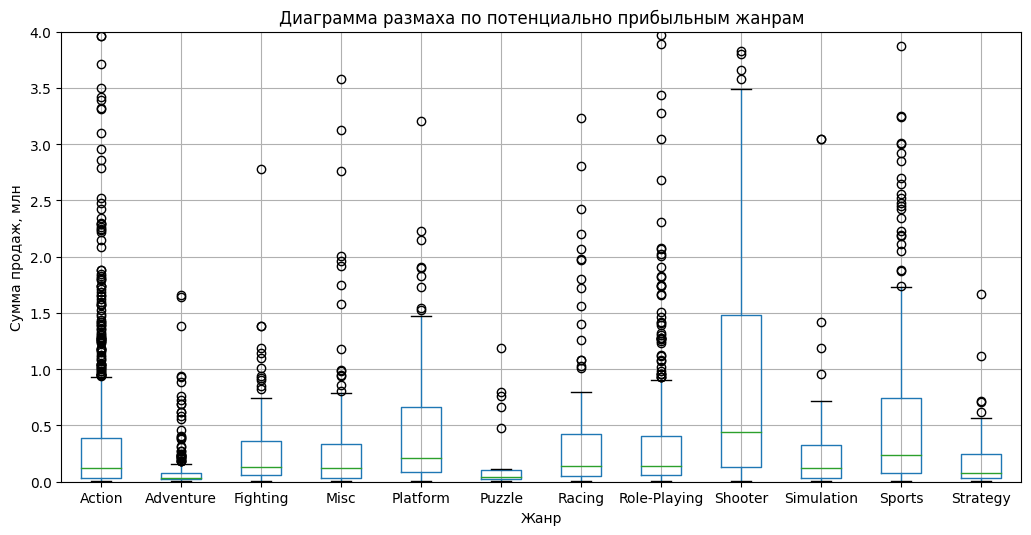

In [259]:
(
    games.boxplot('total_sales', by='genre', figsize=(12,6))
)
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж, млн')
plt.ylim(0,4)
plt.title('Диаграмма размаха по потенциально прибыльным жанрам')
plt.suptitle(None)

Дествительно, если посмотреть внимательнее, то может случиться следущее: один жанр игры на одной платформе взорвала рынок, а на  остальных провалились. Взяв для вравнения сумму продаж как раз этот выброс и учитывается, поэтому чтобы более корректно будет рассматривать медианные значения продаж. В таком случае топ жанров имеет следущее распределение:

Самые продаваемые жанры:
- Shooter	
- Sports
- Platform
- Role-Playing
- Racing

Самые плохопродаваемые жанры:
- Strategy
- Puzzle
- Adventure


## Составление портрета пользователя каждого региона

### Самые популярные платформы

<AxesSubplot:xlabel='platform'>

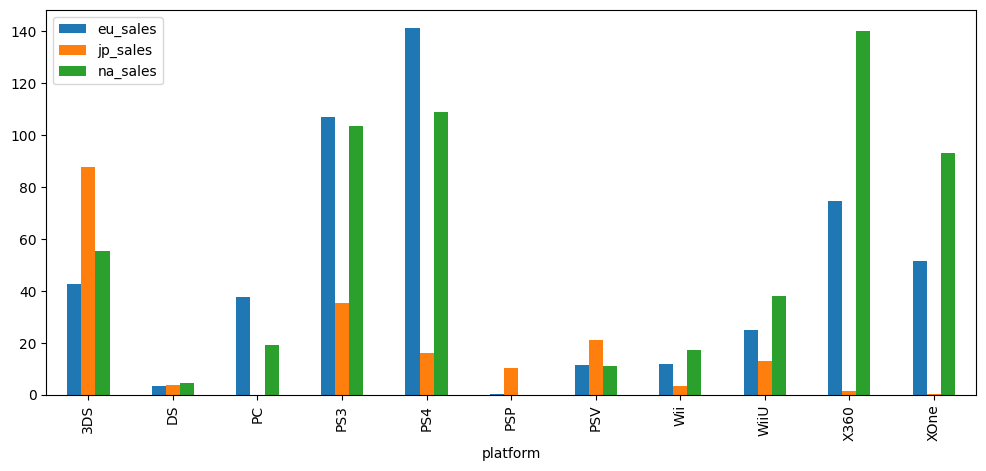

In [260]:
(
    games.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar', figsize=(12,5))
)

In [261]:
games.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


### Самые популярные жанры

<AxesSubplot:xlabel='genre'>

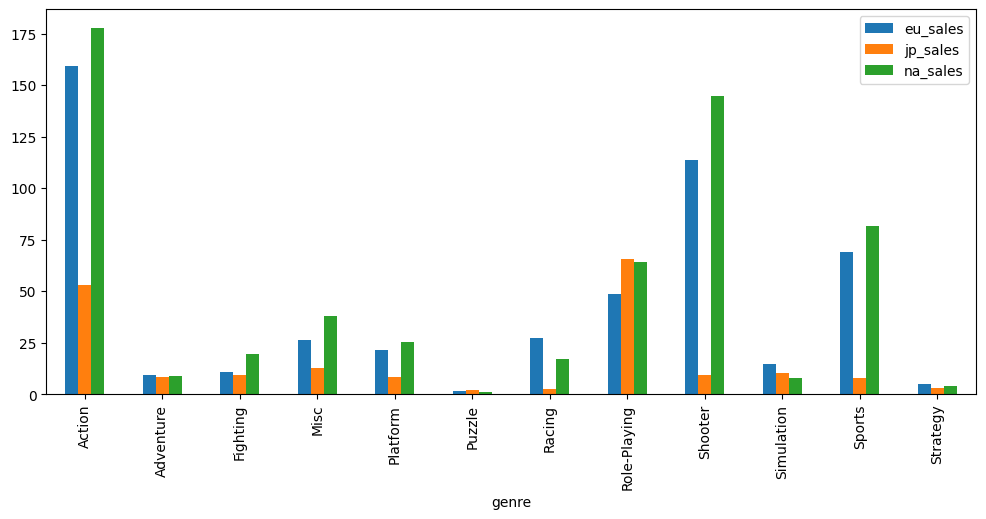

In [262]:
(
    games.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar', figsize=(12,5))
)

In [263]:
games.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


### Влияние рейтинга ESRB на продажи

<AxesSubplot:>

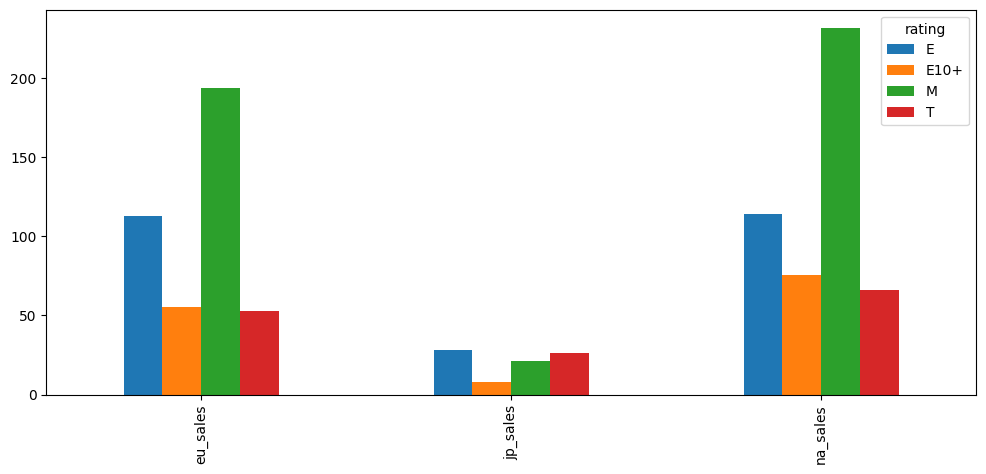

In [264]:
(
    games.pivot_table(columns='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar', figsize=(12,5))
)

In [265]:
games.pivot_table(columns='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

rating,E,E10+,M,T
eu_sales,113.03,55.37,193.96,52.96
jp_sales,28.33,8.19,21.20,26.02
na_sales,114.37,75.70,231.57,66.02


In [266]:
games['rating'] = games['rating'].fillna('unknown')

<AxesSubplot:>

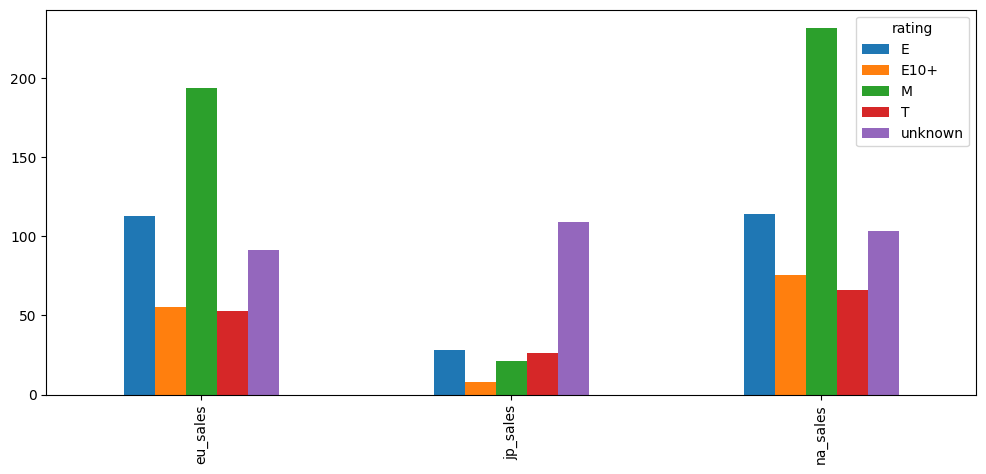

In [267]:
(
    games.pivot_table(columns='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar', figsize=(12,5))
)

In [268]:
games.pivot_table(columns='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

rating,E,E10+,M,T,unknown
eu_sales,113.03,55.37,193.96,52.96,91.50
jp_sales,28.33,8.19,21.20,26.02,108.84
na_sales,114.37,75.70,231.57,66.02,103.31


In [269]:
# Комментарий ревьюера
temp = games.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unknown    1275
M           498
T           412
E           395
E10+        306
Name: rating, dtype: int64

**Выводы:**

Пользователь Японии:
- Топ-5 платформ: 3DS, PS3, PSV, PS4, WiiU
- Топ-5 жанров: Role-Playing, Action, Misc, Simulation, Fighting
- Категория возраста пользователя: большинство игр(около 56%) не оцениваются ESRB, из остальных - самая большая доля продаж приходится на рейтинг E, далее по популярности рейтинг T, совсем немного утупает категория M

Пользователь Северной Америки:
- Топ-5 платформ: X360, PS4, PS3, XOne, 3DS
- Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc
- Категория возраста пользователя: самая большая доля продаж приходится на рейтинг M, далее по популярности рейтинг E, остальные категории сильно уступают

Пользователь Европы:
- Топ-5 платформ: PS4, PS3, X360, XOne, 3DS
- Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Racing
- Категория возраста пользователя: самая большая доля продаж приходится на рейтинг M, далее по популярности рейтинг E, остальные категории сильно уступают

Американский и европеский рынок очень похожи как по используемым платформам, так и по жанрам игр. Основные платформы для европейцев и американцев - это XBox и SonyPlaystation разных поколений,в то время, как японцы пользуются отечественными платформами: Sony и Nintendo.

## Проверка гипотез

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Необходимо сформулировать гипотезы:

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [270]:
print(' Средний рейтинг XOne: {:.3}'.format(games.query("platform == 'XOne'")["user_score"].mean()))
print(' Средний рейтинг PS4: {:.3}'.format(games.query("platform == 'PS4'")["user_score"].mean()))

 Средний рейтинг XOne: 6.52
 Средний рейтинг PS4: 6.75


In [271]:
print('Дисперсия XOne: {:.3}'.format(np.var(games.query("platform == 'XOne'")["user_score"])))
print('Дисперсия PS4: {:.3}'.format(np.var(games.query("platform == 'PS4'")["user_score"])))

Дисперсия XOne: 1.9
Дисперсия PS4: 2.12


Воспользуемся гипотезой о равенстве средних двух генеральных совокупностей, Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примем метод scipy.stats.ttest_ind(). Дисперсии отличаются более, чем на 10 %, поэтому в параметре equal_var = False.

In [272]:
# Выберем необходимые данные для проверки гипотез
alpha = .05 # критический уровень статистической значимости

games_x_one = games.query('platform == "XOne"')['user_score'].dropna()
games_pc = games.query('platform == "PC"')['user_score'].dropna()

results = st.ttest_ind(games_x_one, games_pc, equal_var = False)

print(f'Значение p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Средние оценки пользователей на этих платформах не отличаются.

### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные

Необходимо сформулировать гипотезы:

- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports отличаются

In [273]:
print(' Средний рейтинг Action: {:.3}'.format(games.query("genre == 'Action'")["user_score"].mean()))
print(' Средний рейтинг Sports: {:.3}'.format(games.query("genre == 'Sports'")["user_score"].mean()))

 Средний рейтинг Action: 6.83
 Средний рейтинг Sports: 5.46


In [274]:
print('Дисперсия Action: {:.3}'.format(np.var(games.query("genre == 'Action'")["user_score"])))
print('Дисперсия Sports: {:.3}'.format(np.var(games.query("genre == 'Sports'")["user_score"])))

Дисперсия Action: 1.89
Дисперсия Sports: 3.01


Воспользуемся гипотезой о равенстве средних двух генеральных совокупностей, Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примем метод scipy.stats.ttest_ind(). Дисперсии отличаются более, чем на 60 %, поэтому в параметре equal_var = False.

In [275]:
# Выберем необходимые данные для проверки гипотез
alpha = .05 # критический уровень статистической значимости

games_action = games.query('genre == "Action"')['user_score'].dropna()
games_sports = games.query('genre == "Sports"')['user_score'].dropna()

results = st.ttest_ind(games_x_one, games_pc, equal_var = False)

print(f'Значение p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Отвергаем нулевую гипотезу о равенстве рейтингов, следовательно оценки пользователей у этих жанров с очень большой вероятносью разные.

## Общий вывод

Мы изучили выборку данных о видеоиграх, вышедших с 1980 по 2016 годы на разных платформах - консолях и персональных компьютерах. На основе этих данных мы выяснили, какие игры могут хорошо продаваться в 2017 году и составили портреты пользователей разных регионов, которые стоит учитывать при разработке игры.

*Пользователь Японии:*
- Топ-5 платформ: 3DS, PS3, PSV, PS4, WiiU
- Топ-5 жанров: Role-Playing, Action, Misc, Simulation, Fighting
- Категория возраста пользователя: большинство игр(около 56%) не оцениваются ESRB, из остальных - самая большая доля продаж приходится на рейтинг E, далее по популярности рейтинг T, совсем немного утупает категория M

*Пользователь Северной Америки:*
- Топ-5 платформ: X360, PS4, PS3, XOne, 3DS
- Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc
- Категория возраста пользователя: самая большая доля продаж приходится на рейтинг M, далее по популярности рейтинг E, остальные категории сильно уступают

*Пользователь Европы:*
- Топ-5 платформ: PS4, PS3, X360, XOne, 3DS
- Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Racing
- Категория возраста пользователя: самая большая доля продаж приходится на рейтинг M, далее по популярности рейтинг E, остальные категории сильно уступают

**Закономерности, которые позволят выпустить потенциально прибыльную видеоигру:**
- Самые перспективные платформы: PS4 и Xone
- При выходе платформ нового поколения, популярность предыдущей падает(например, PS4 - PS3)
- Оценки пользователей не влияют на продажу игры, оценки критиков учитываются, но несильно(коэффициент корреляции порядка 0.4)
- Жанры, принесшие наибольшую прибыль: Action, Shooter, Role-Playing
- Категорию возраста игры лучше выбрать или для всех(E), или для тех, кто постарше(M - 17+)
- Нужно учитывать географию продаж игр, предпочтения к жанрам и платформам различаются